#### Simulating a homeless care system 
This notebook runs a discrete-event simulation model of a homeless care system in Alameda County, California. It reads data from a .json file and plots outputs for the number of people unsheltered. 

In [1]:
import json
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

In [2]:
# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

# Import modules
import simulation_model as sm

In [3]:
# Data
with open('../data/data.json') as json_file:
    data = json.load(json_file)

# DES model run
s = sm.SimulationModel(data, data['solution'])
s.analyse()

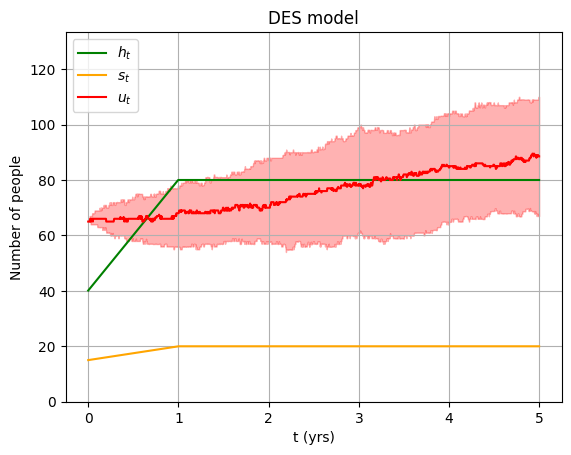

In [4]:
# PLOTTING
fig, ax = plt.subplots()
ymax = max(s.results['unsheltered_q_over_time'].max(), max(s.s), max(s.h))
        
# plot Q dynamics
x = [i/365 for i in range((s.end_of_simulation)*365)]
ax.plot(x, s.h, color = 'green')
ax.plot(x, s.s, color = 'orange')
ax.plot(x, s.median, color = 'red')
ax.fill_between(x, s.low, s.high, color='red', alpha=0.3)
ax.legend(["$h_t$", "$s_t$", "$u_t$"], loc="upper left")
ax.set(title = "DES model")

# formatting
ax.set(xlabel='t (yrs)', ylabel='Number of people')
ax.grid()
ax.set_ylim(0, ymax*1.05)
ax.label_outer()
        
# display
plt.show()

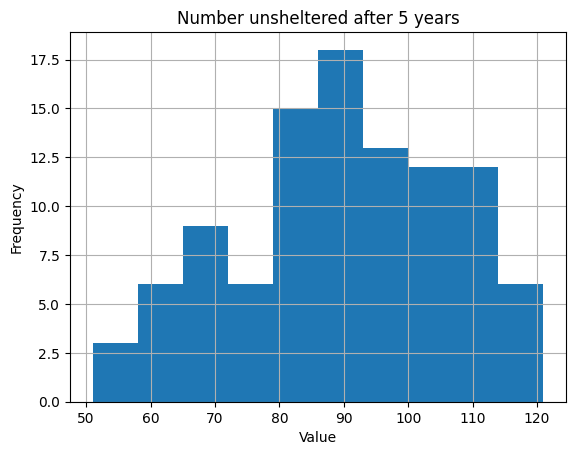

In [7]:
# Output
output = s.results['unsheltered_q_over_time'][len(s.results['unsheltered_q_over_time'])-1]

# Plot histogram
plt.hist(output, bins=10)
plt.title('Number unsheltered after 5 years')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()